In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import mysql.connector
import networkx as nx
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon,MultiPolygon,LineString,MultiLineString,LinearRing,Point
from shapely import symmetric_difference
from shapely.ops import nearest_points
from shapely.wkt import loads
import scipy
import time
import numpy as np
import random
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt
import osmnx as ox
import glob
from itertools import combinations,product
from copy import deepcopy
import os
from lib_contour_lines import *
import mysql.connector


In [2]:
#set global net_buffer_length=1000000; 
#set global max_allowed_packet=1000000000;

In [3]:

cnx = mysql.connector.connect(user='spirz', 
                              password='this_is_my_PASSWORD_m8',
                              host='localhost',
                              database='dem_from_contours_lines',
                              autocommit=True)
cursor = cnx.cursor(buffered=True,dictionary=True)
contours_lines_table_name='contours_lines'
contours_edges_table_name="contours_edges"
2

2

In [4]:
t1=time.time()
G=build_graph(cursor)
t2=time.time()
print(t2-t1)

1.334397554397583


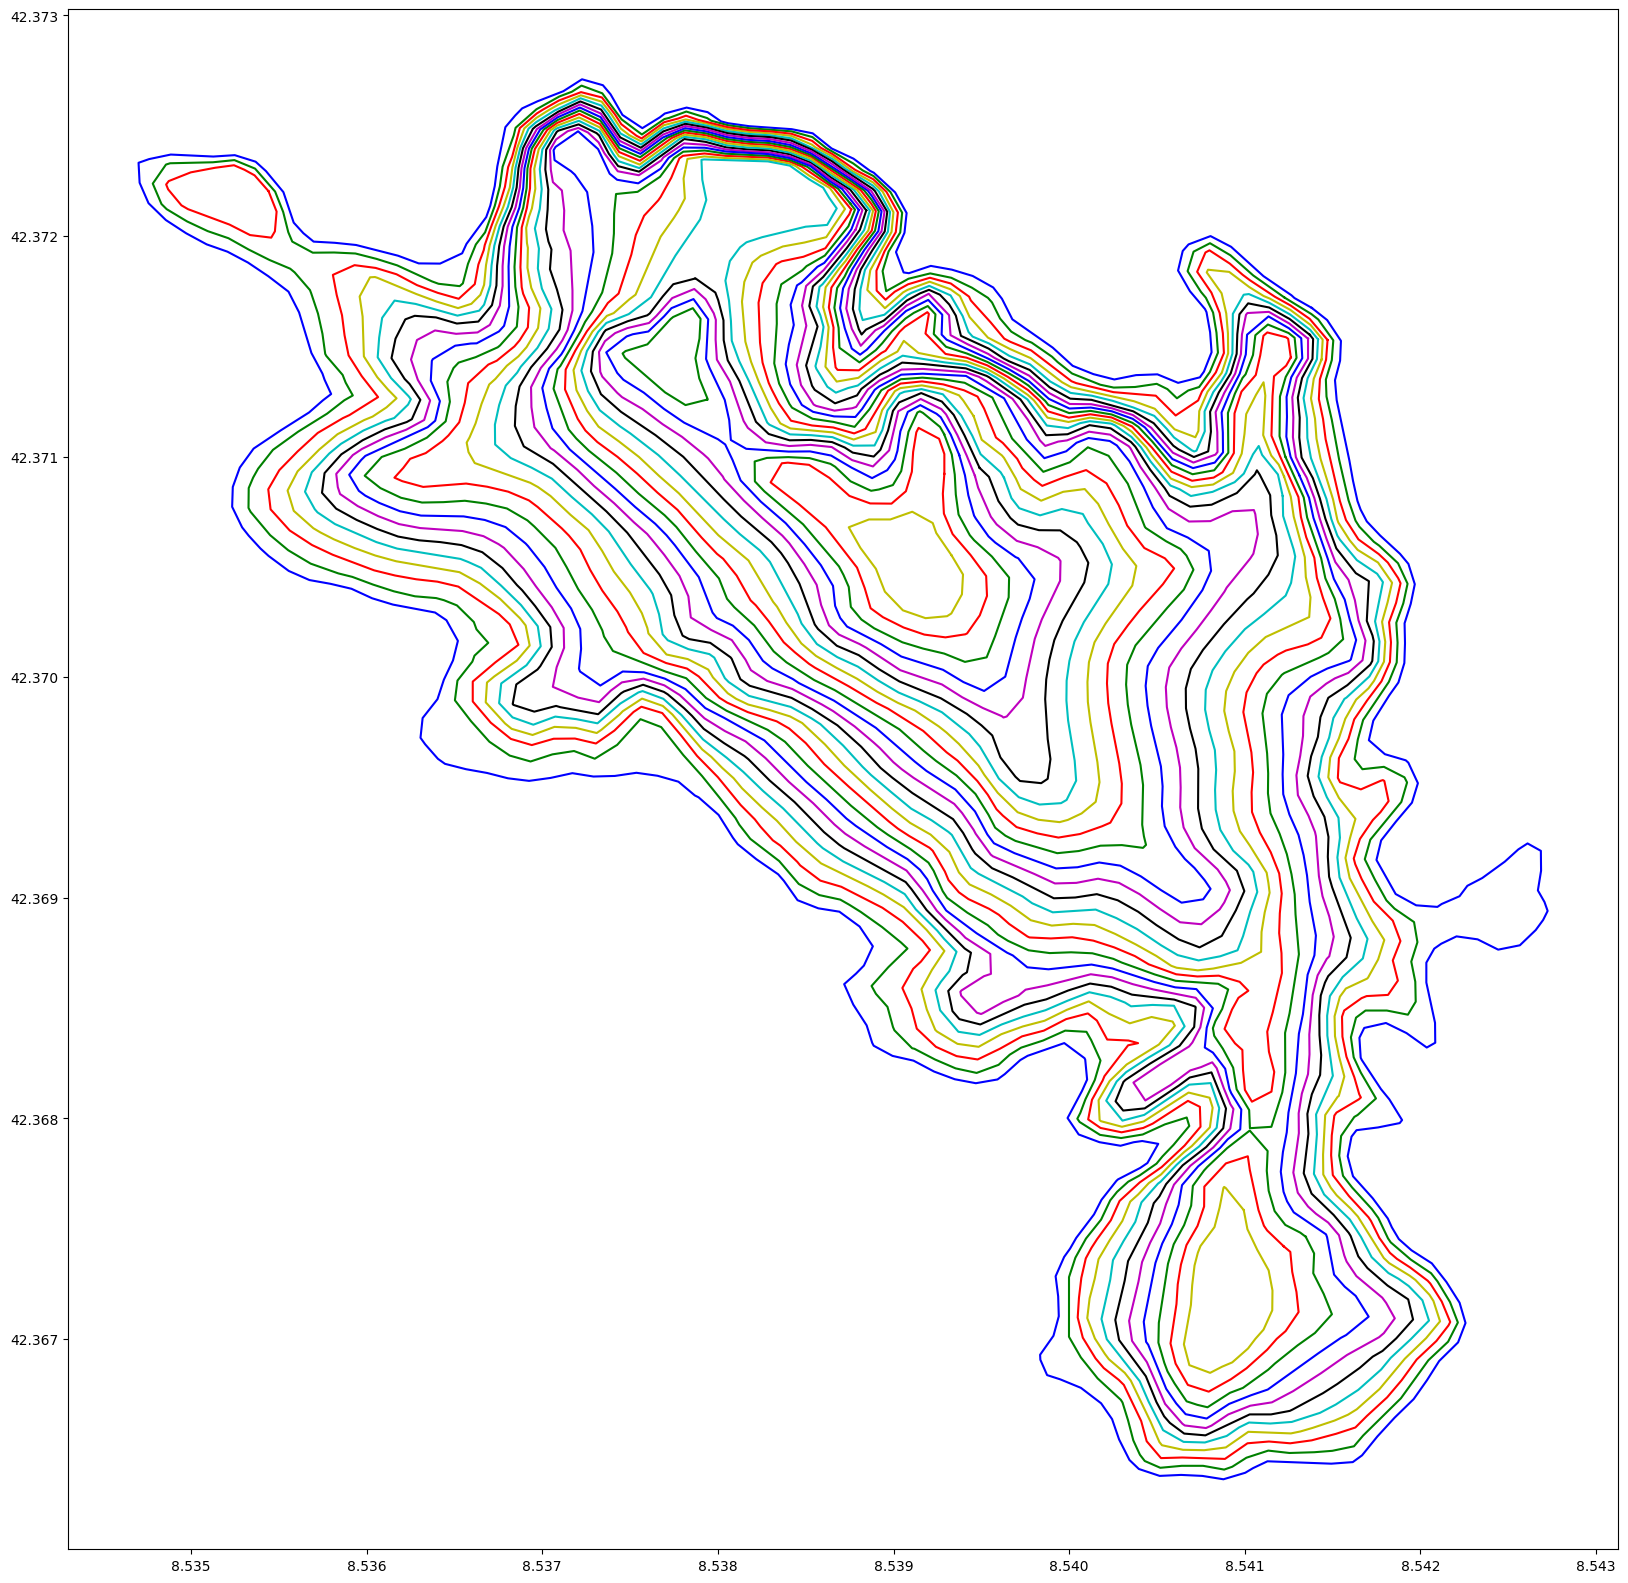

In [6]:
plt.rcParams['figure.figsize']=(20,20)
colors=['b','g','r','y','c','k','m']
root=58017
df=get_nodes_data(cursor,[root]+list(nx.descendants(G,root)))
elevations=np.sort(df['elevation'].unique())

for _,row in df.iterrows():
    ls=row['geometry']
    coords=np.array(ls.coords)
    elevation=row['elevation']
    k=np.where(elevations==elevation)[0][0]
    c=colors[k%len(colors)]
    plt.plot(coords[:,0],coords[:,1],c=c)

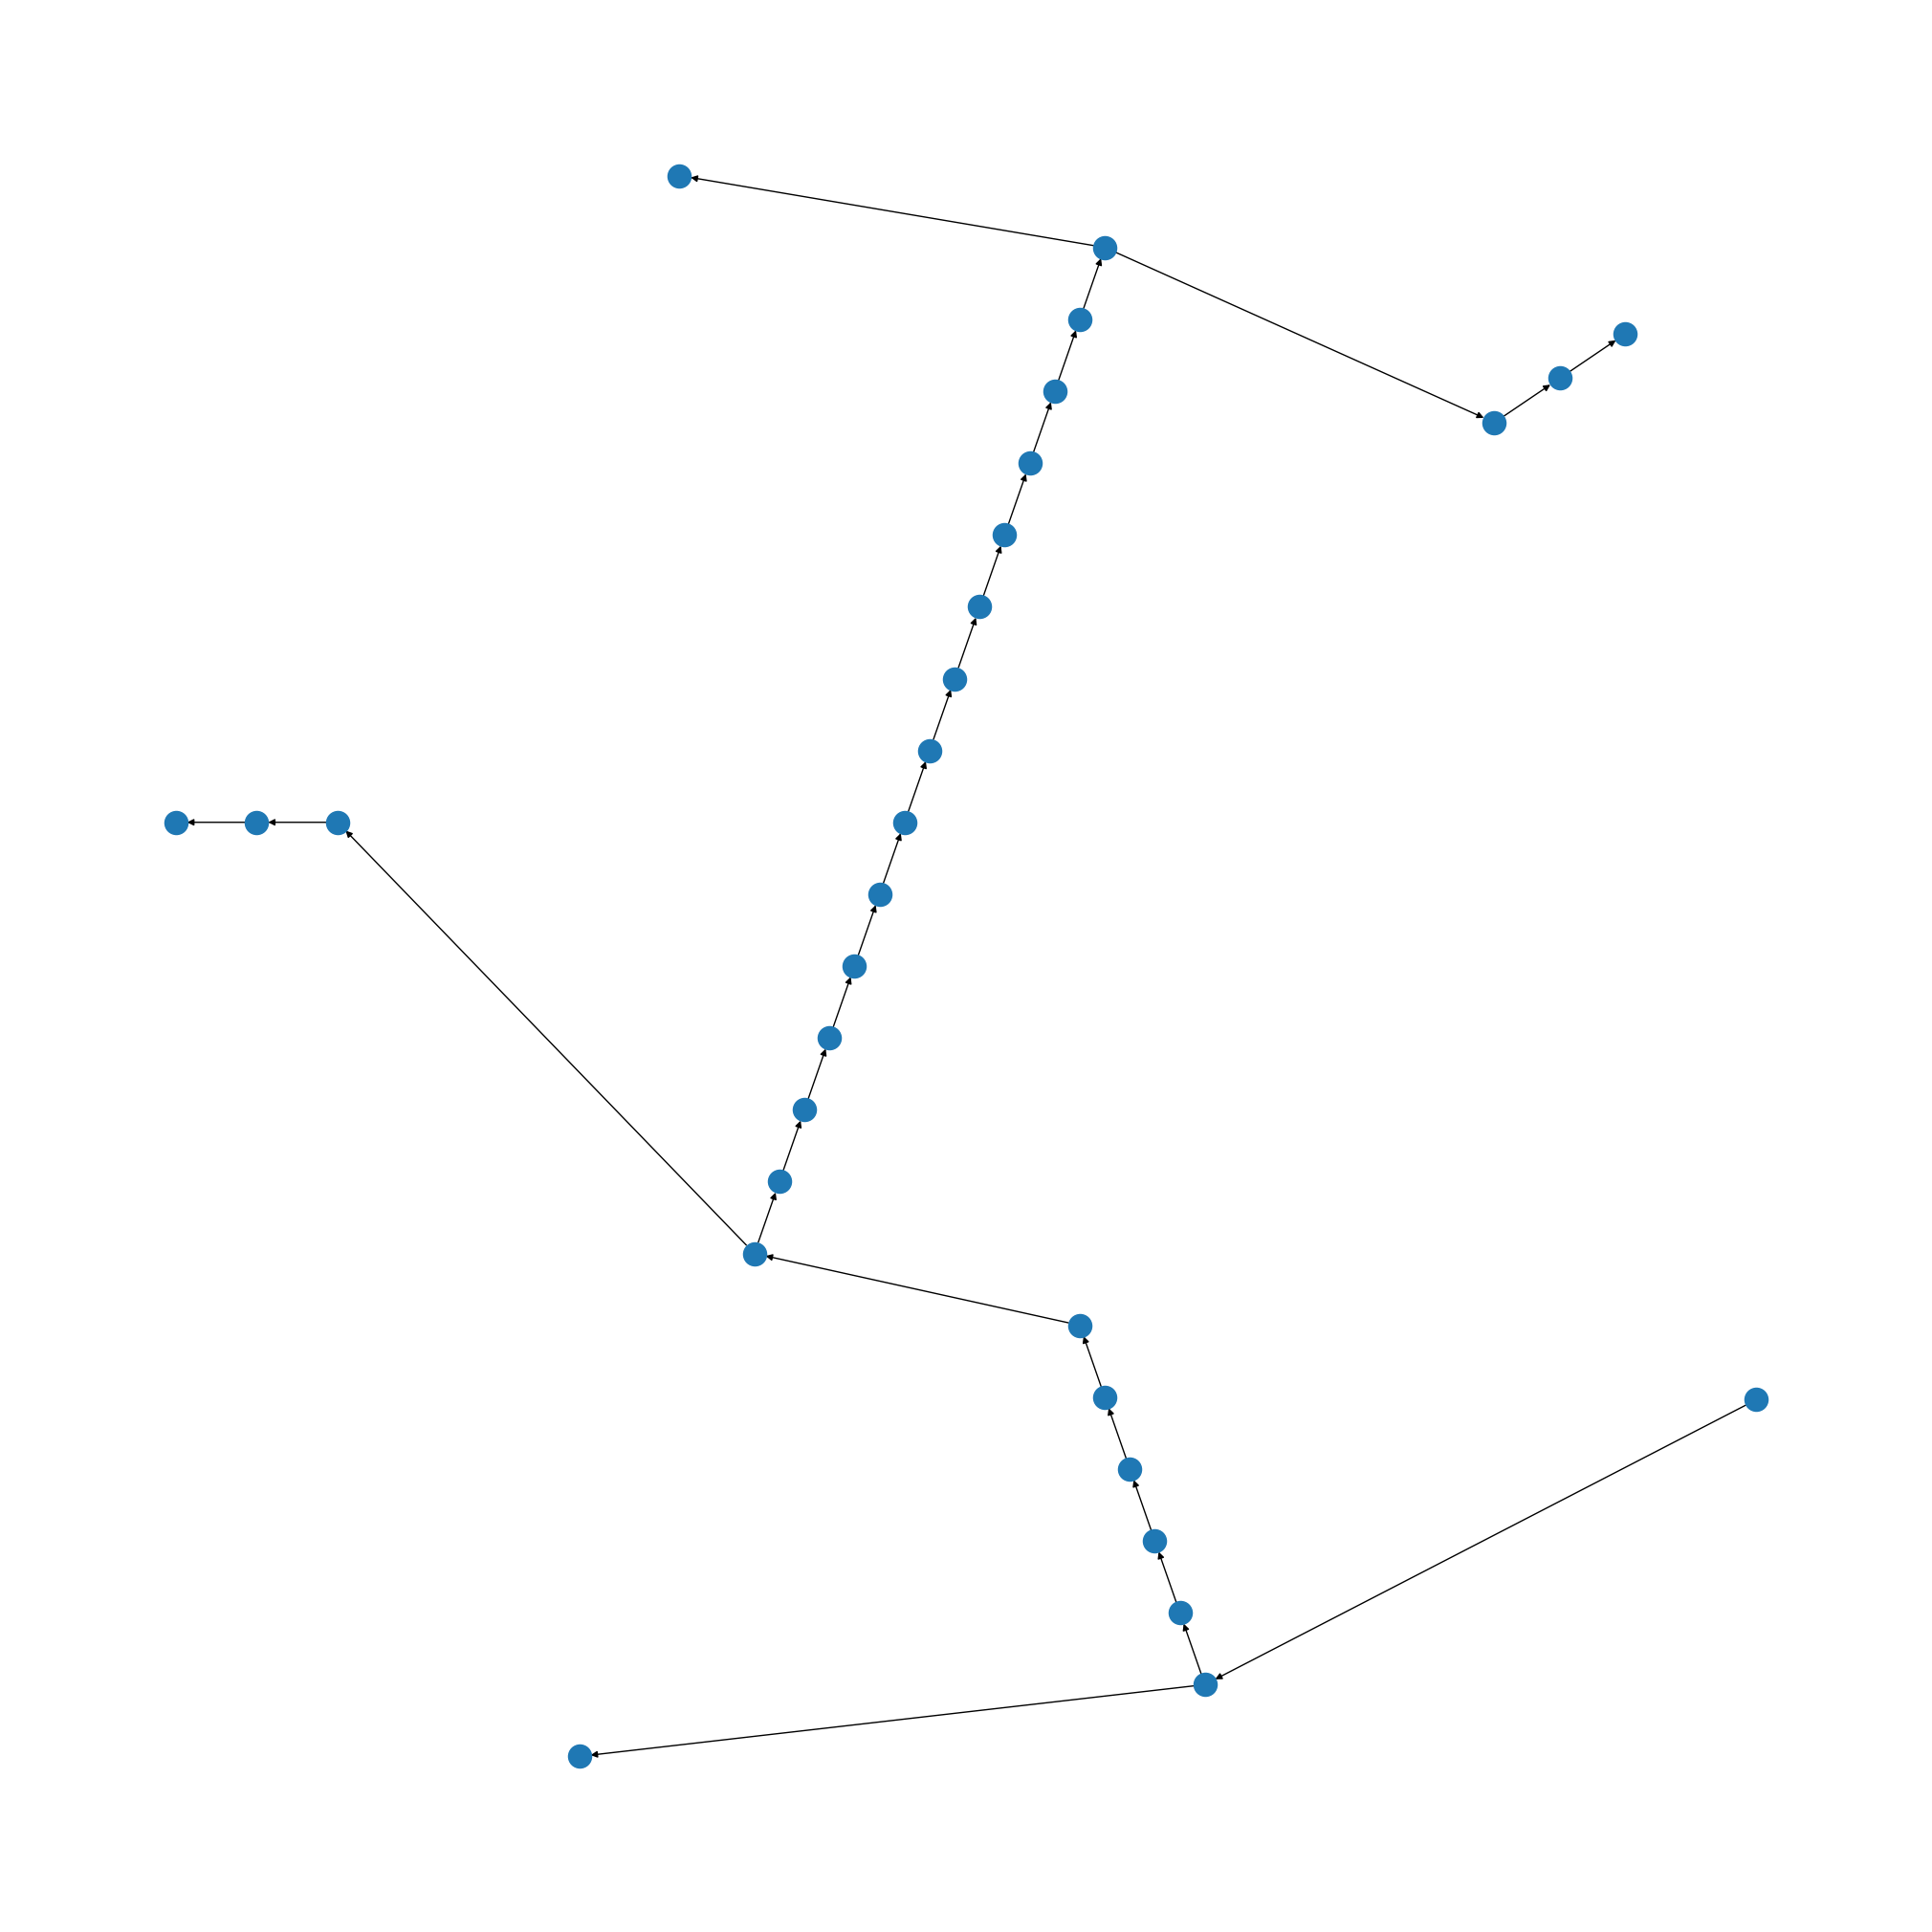

In [7]:
sub_tree=nx.subgraph(G,[root]+list(nx.descendants(G,root)))
pos=nx.nx_agraph.graphviz_layout(sub_tree, prog="twopi", args="")

nx.draw(sub_tree,pos=pos)